In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

XData = []
yData = []

age_list = dict()

import os
for dirname, _, filenames in os.walk('dataset'):
    for i,filename in enumerate(filenames):
        content = filename.split("_")
        age = content[0]
        
        try:
        
            if(age_list[age] < 110):
                yData.append(content[0])

                img = cv2.imread(os.path.join(dirname, filename))
                img = img / 25
                img = cv2.resize(img, (150, 150))
                XData.append(img)

                age_list[age] = age_list[age] + 1
            
        
        except:
            age_list[age] = 0
        
        if(i % 100 == 0):
            print(i, end = " ")

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 12100 12200 12300 12400 12500 12600 12700 12800 12900 13000 13100 13200 13300 13400 13500 13600 13700 13800 13900 14000 14100 14200 14300 14400 14500 14600 14700 14800 14900 15000 15100 15200 15300 15400 15500 15600 15700 15800 15900 16000 16100 16200 16300 16400 16500 16600 16700 16800 16900 17000 17100 17200 17300 17400 17500 17600 17700 17800 17900 18000 18100 18200 18300 18400 18

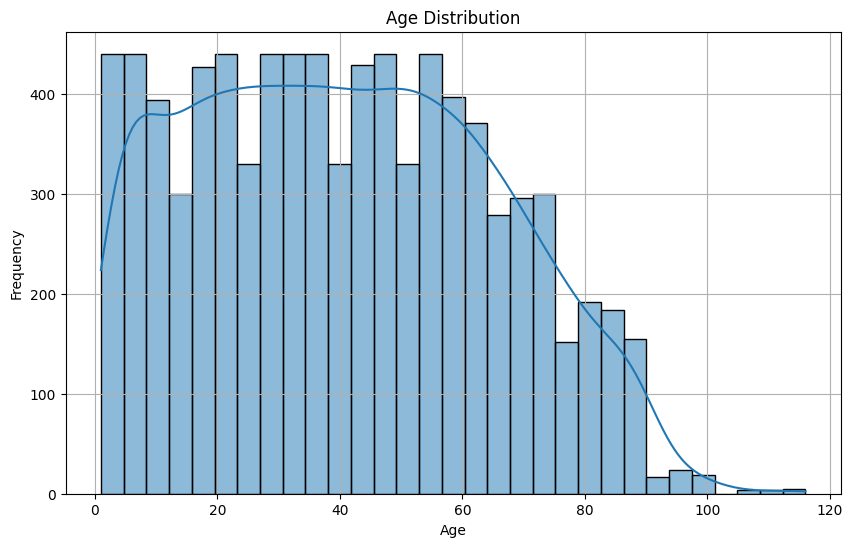

In [3]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
# Now, let's perform EDA on the collected data:
# 2. Descriptive Statistics (for age):
age_values = [int(age) for age in yData]
age_series = pd.Series(age_values)
age_summary = age_series.describe()

# 3. Data Visualization
# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(age_values, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# write 100 for >100

# find more data to make all 300 (75+)

In [5]:
age_summary

count    8459.000000
mean       40.784253
std        24.249485
min         1.000000
25%        21.000000
50%        40.000000
75%        59.000000
max       116.000000
dtype: float64

In [6]:
age_series.head()

0    100
1    100
2    100
3    100
4    100
dtype: int64

In [7]:
age_series.shape

(8459,)

In [8]:
age_series.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8459 entries, 0 to 8458
Series name: None
Non-Null Count  Dtype
--------------  -----
8459 non-null   int64
dtypes: int64(1)
memory usage: 66.2 KB


In [9]:
age_series.nunique()

102

In [ ]:
class diagrams on certain age (histogram equalization)


contrast
contours
edges
bluring

original image - blurred image 